# Tower Of Hanoi

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple,List
from math import floor,log,exp

## Here is where we run a simulation of the most optimal Tower Of Hanoi solution

In [2]:
def towerOfHanoi(n):
    tower = [[i for i in reversed(range(n))], [], []]
    whichDiskMoved = [-1 for _ in range(2**n-1)]
    whatMoveWasMade = [-1 for _ in range(2**n-1)]
    move = -1
    def solve(n, source, middle, destination):
        if n <= 0:
            return
        sourceTower = tower[source]
        destinationTower = tower[destination]
        solve(n-1,source,destination,middle)
        destinationTower.append(sourceTower.pop())
        nonlocal move
        move+=1
        whichDiskMoved[move] = destinationTower[-1]
        whatMoveWasMade[move] = [whichDiskMoved[move],source,destination]
        solve(n-1,middle,source,destination)
    solve(n,0,1,2)
    return (whichDiskMoved, whatMoveWasMade)
n = 5
whichDiskMoved,whatMoveWasMade = towerOfHanoi(n)

## Here we shall plot the results of the simulation above

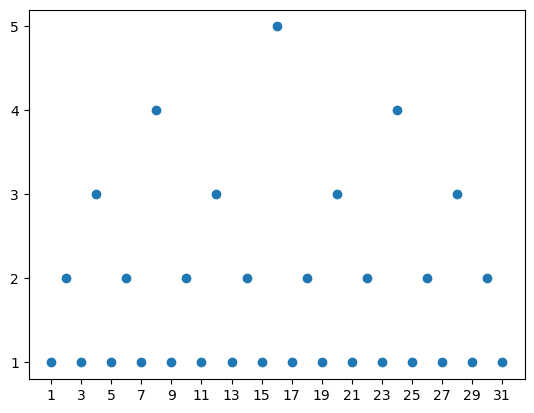

In [3]:
plt.scatter([i+1 for i in range(len(whichDiskMoved))], [d+1 for d in whichDiskMoved])
plt.xticks(np.arange(1, len(whichDiskMoved)+1, 2.0))
plt.yticks(np.arange(1, n+1, 1.0))
plt.show()

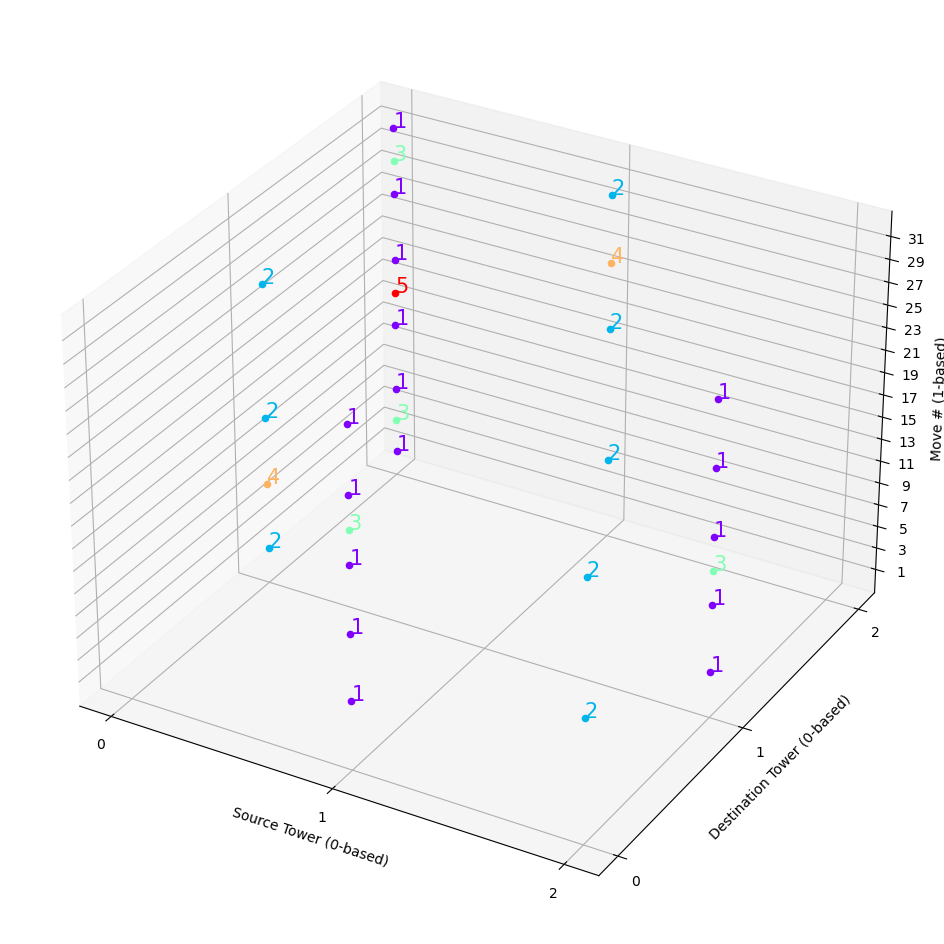

In [4]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
colors = {disk:color for disk,color in zip(range(1,n+1),iter(plt.cm.rainbow(np.linspace(0, 1, n))))}
for idx,triplet in enumerate(whatMoveWasMade):
    disk,source,dest = triplet
    disk+=1
    move = idx+1
    color = colors[disk]
    ax.scatter(source,dest,move,color=color)
    ax.text(source,dest,move,  '%s' % (str(disk)), size=15, zorder=1, color=color)
ax.set_xlabel('Source Tower (0-based)')
ax.set_xticks(np.arange(0, 3, 1.0))
ax.set_ylabel('Destination Tower (0-based)')
ax.set_yticks(np.arange(0, 3, 1.0))
ax.set_zlabel('Move # (1-based)')
ax.set_zticks(np.arange(1, len(whichDiskMoved)+1, 2.0))
plt.show()

## Here we shall define a function that indicates where disk `d` is after move `m`

### NOTE: This function comes in three different implementations. The function indexed 0 is the most preferrable

In [5]:
def whereIsDiskAfterMove0(d:int, m:int,n:int)->int:
    if not (1<=d<=n) or not (0 <= m <= 2**n - 1):
        # Disk index must be between 1 and n inclusive
        # Also, move number must be between 1 and 2**n - 1 inclusive 
        return None
    # Let us find the destination tower
    movesMadeBeforehand = (m+2**(d-1)) // 2**d
    destination = movesMadeBeforehand * (-1 if d%2 == n%2 else 1)
    destination %= 3
    return destination

def whereIsDiskAfterMove1(d:int, m:int,n:int)->int:
    if not (1<=d<=n) or not (0 <= m <= 2**n - 1):
        # Disk index must be between 1 and n inclusive
        # Also, move number must be between 1 and 2**n - 1 inclusive 
        return None
    # Let us find the destination tower
    movesMadeBeforehand = floor(((m-2**(d-1)) / 2**d) + 1)
    destination = movesMadeBeforehand * (-1 if d%2 == n%2 else 1)
    destination %= 3
    return destination

def whereIsDiskAfterMove2(d:int, m:int,n:int)->int:
    if not (1<=d<=n) or not (0 <= m <= 2**n - 1):
        # Disk index must be between 1 and n inclusive
        # Also, move number must be between 1 and 2**n - 1 inclusive 
        return None
    # Let us find the destination tower
    # NOTE: If disk d moves on move m, disk d's next move will be m + 2^d
    movesMadeBeforehand = m // (2**d)
    nextMoveOfD = (2**(d-1))*(2*movesMadeBeforehand+1)
    destination = (movesMadeBeforehand+(m>=nextMoveOfD)) * (-1 if d%2 == n%2 else 1)
    destination %= 3
    return destination

## Let us now test the function mentioned above

In [6]:
# If you're given move m and n (total number of disks),
#   write a Python function to draw the current situation right after move m finishes
def diskLocationsAfterMove(m:int, n:int)->List[int]:
    if not (0 <= m <= 2**n - 1):
        # Move number must be between 1 and 2**n - 1 inclusive 
        return None
    diskLocations = [0 for _ in range(n)]
    for d in range(1,n+1):
        destination = whereIsDiskAfterMove0(d,m,n)
        diskLocations[d-1] = destination
    return diskLocations
for i in range(2**n):
    print(f"{i} = {diskLocationsAfterMove(i,n)}")

0 = [0, 0, 0, 0, 0]
1 = [2, 0, 0, 0, 0]
2 = [2, 1, 0, 0, 0]
3 = [1, 1, 0, 0, 0]
4 = [1, 1, 2, 0, 0]
5 = [0, 1, 2, 0, 0]
6 = [0, 2, 2, 0, 0]
7 = [2, 2, 2, 0, 0]
8 = [2, 2, 2, 1, 0]
9 = [1, 2, 2, 1, 0]
10 = [1, 0, 2, 1, 0]
11 = [0, 0, 2, 1, 0]
12 = [0, 0, 1, 1, 0]
13 = [2, 0, 1, 1, 0]
14 = [2, 1, 1, 1, 0]
15 = [1, 1, 1, 1, 0]
16 = [1, 1, 1, 1, 2]
17 = [0, 1, 1, 1, 2]
18 = [0, 2, 1, 1, 2]
19 = [2, 2, 1, 1, 2]
20 = [2, 2, 0, 1, 2]
21 = [1, 2, 0, 1, 2]
22 = [1, 0, 0, 1, 2]
23 = [0, 0, 0, 1, 2]
24 = [0, 0, 0, 2, 2]
25 = [2, 0, 0, 2, 2]
26 = [2, 1, 0, 2, 2]
27 = [1, 1, 0, 2, 2]
28 = [1, 1, 2, 2, 2]
29 = [0, 1, 2, 2, 2]
30 = [0, 2, 2, 2, 2]
31 = [2, 2, 2, 2, 2]


## Let's test our diskLocationsAfterMove() function on n = 30 and m = 10^9

In [7]:
diskLocationsAfterMove(10**9, 30)

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 2]

## We can also graph the results of diskLocationsAfterMove() for any arbitrary pair of arguments

In [42]:
def plotLocationsAfterMove(m:int,n:int)->None:
    diskLocations = diskLocationsAfterMove(m,n)
    colors = {disk:color for disk,color in zip(range(3),["red","blue","green"])}
    print(diskLocations)
    k = exp(log(5.85**4)/n)
    a = 16
    plt.figure(figsize=(5, 5))
    plt.scatter(
        diskLocations,
        [d+1 for d,tower in enumerate(diskLocations)],
        color = [colors[location] for location in diskLocations],
        s = [ a*k**i for i in range(1,n+1)],
        marker = '_'
    )
    plt.gca().invert_yaxis()
    plt.title(f"Disk Locations After Move {m} Where N = {n}")
    plt.xticks(np.arange(0, 3, 1.0))
    plt.xlim(-1, 3)
    plt.xlabel("Tower")
    plt.yticks(np.arange(1, n+1, 1.0))
    plt.ylabel("Disk")
    plt.show()

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


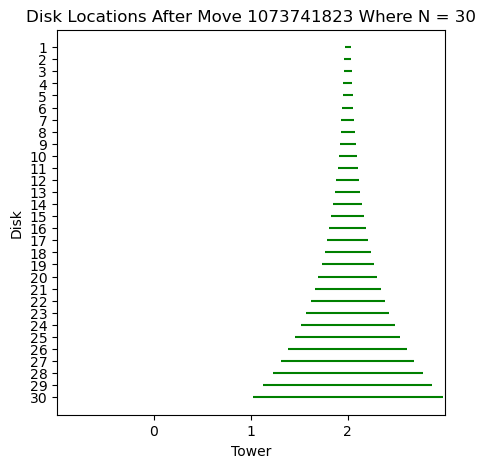

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


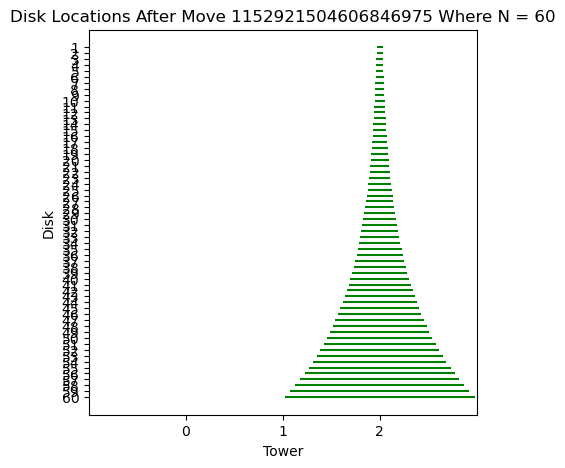

[2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2]


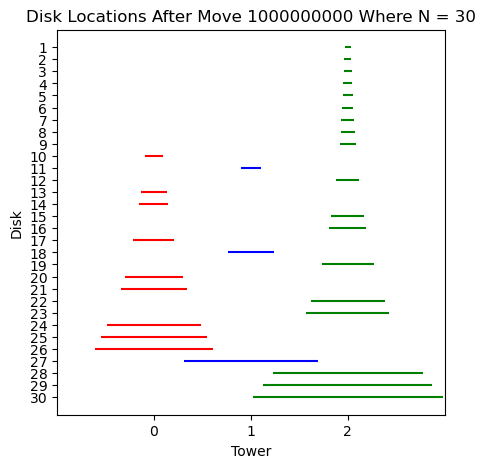

[2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


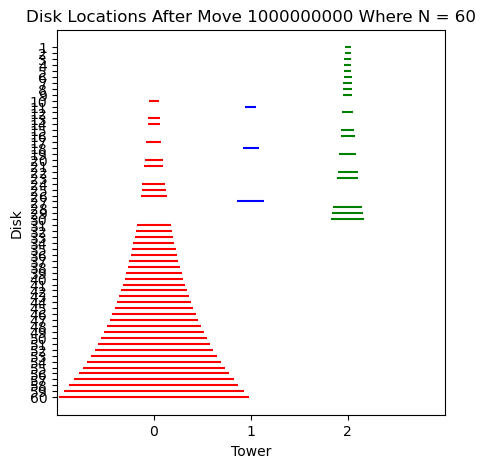

[0, 1, 2, 2, 2]


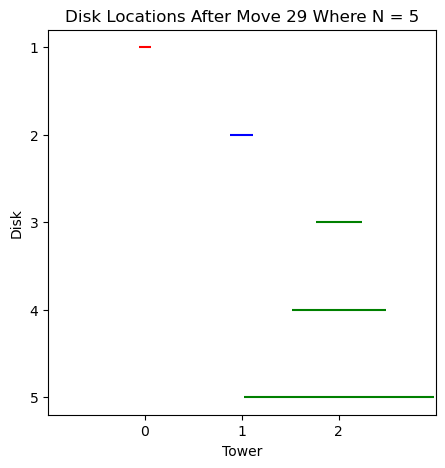

In [43]:
plotLocationsAfterMove(2**30-1, 30)
plotLocationsAfterMove(2**60-1, 60)
plotLocationsAfterMove(10**9, 30)
plotLocationsAfterMove(10**9, 60)
plotLocationsAfterMove(29, 5)